# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aryasaty Kirana T.M.
- **Email:** aryasatykrn@gmail.com
- **ID Dicoding:** aryasaty_kirana

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan jumlah penyewaan sepeda selama tahun 2011-2012 berdasarkan efek musim?
- Bagaimana perbandingan jumlah penyewaan sepeda selama tahun 2011-2012 berdasarkan efek cuaca?
- Bagimana perbandingan jumlah penyewaan sepeda pada saat hari libur, hari kerja, dan hari biasa pada tahun 2011 dan 2012?
- Bagaimana perbandingan pengguna casual dan terdaftar dalam tahun 2011 dan 2012?
- Bagaimana jumlah penyewaan pada bulan  tertentu?
- Bagaimana jumlah penyewaan pada jam tertentu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd #berfungsi untuk analisis dan manipulasi data
import numpy as np #untuk operasi numerik
import seaborn as sns #untuk plot statistik
import matplotlib.pyplot as plt #berfungsi untuk visualisasi chart, barchart, scatterplot, dll


In [2]:
pip install --upgrade seaborn


Note: you may need to restart the kernel to use updated packages.


## Data Wrangling

### Gathering Data

1. Membuat dataframe yang berisi file hour.csv dari bike sharing dataset

In [3]:
bikehour_df = pd.read_csv("Data/hour.csv")
bikehour_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

2. Membuat dataframe yang berisi file day.csv dari bike sharing dataset

In [4]:
bikeday_df = pd.read_csv("Data/day.csv")
bikeday_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

**Insight:**
 1. Data hour.csv
- Langkah pertama, membuat dataframe yang berisi file hour.csv dari bike sharing dataset yang dihitung berdasarkan perjam. Data ditampilkan 5 baris pertama. Terdapat 17 variabel dalam data tersebut. Variabel tersebut berupa : instant, dteday,sesason, yr, mnth,hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt. Dari ke-17 variabel tersebut, dapat digunakan untuk menyimpulkan beberapa prediksi seperti:


### Assessing Data

Data yang digunakan berjudul "Bike Sharing Dataset" yang terdiri dari data penyewaan berdasarkan harian dan jam antara tahun 2011 dan 2012. Berikut akan dijelaskan mengenai struktur data yang digunakan.

### 1. Dataset information

### a. Berdasarkan hour.csv

In [5]:
bikehour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Pada data tersebut terdapat 17 kolom atau variabel. Terdapat pula 17378 nilai non-null dalam tiap variabel/kolom yang tersedia. Variabel yang memiliki tipe data float64 sebanyak 4, terdapat 12 variabel yang bertipe data int64. Sementara variabel "dtday" memiliki tipe data object dan seharusnya diubah menjadi datetime64.

### b. Berdasarkan day.csv

In [6]:
bikeday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Pada data tersebut terdapat 16 kolom atau variabel. Terdapat pula 731 nilai non-null dalam tiap variabel/kolom yang tersedia. Variabel yang memiliki tipe data float64 sebanyak 4, terdapat 11 variabel yang bertipe data int64. Sementara variabel "dtday" memiliki tipe data object dan seharusnya diubah menjadi datetime64.

2. Melakukan pengecekan missing value

a. pada hour.csv

In [7]:
bikehour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- tidak terdapat missing value pada data hour.csv

b. pada day.csv

In [8]:
bikeday_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- tidak terdapat missing value pada data day.csv

3. Melakukan Pendeskripsian Data pada dataset pada setiap variabelnya

a. Pada data hour.csv

In [9]:
bikehour_df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

b. pada data day.csv

In [10]:
bikeday_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

### Cleaning Data

1. Mengubah tipe data pada variabel "dteday" dari object menjadi datetime64

a. pada data hour.csv

In [11]:
bikehour_df["dteday"] = pd.to_datetime(bikehour_df["dteday"])
bikehour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

b. pada data day.csv

In [12]:
bikeday_df["dteday"] = pd.to_datetime(bikeday_df["dteday"])
bikeday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- pada kedua data tersebut tipe data pada variabel "dteday" sudah berubah menjadi datetime64

## Exploratory Data Analysis (EDA)

### 1. Data hour.csv

### A. Scatter plot

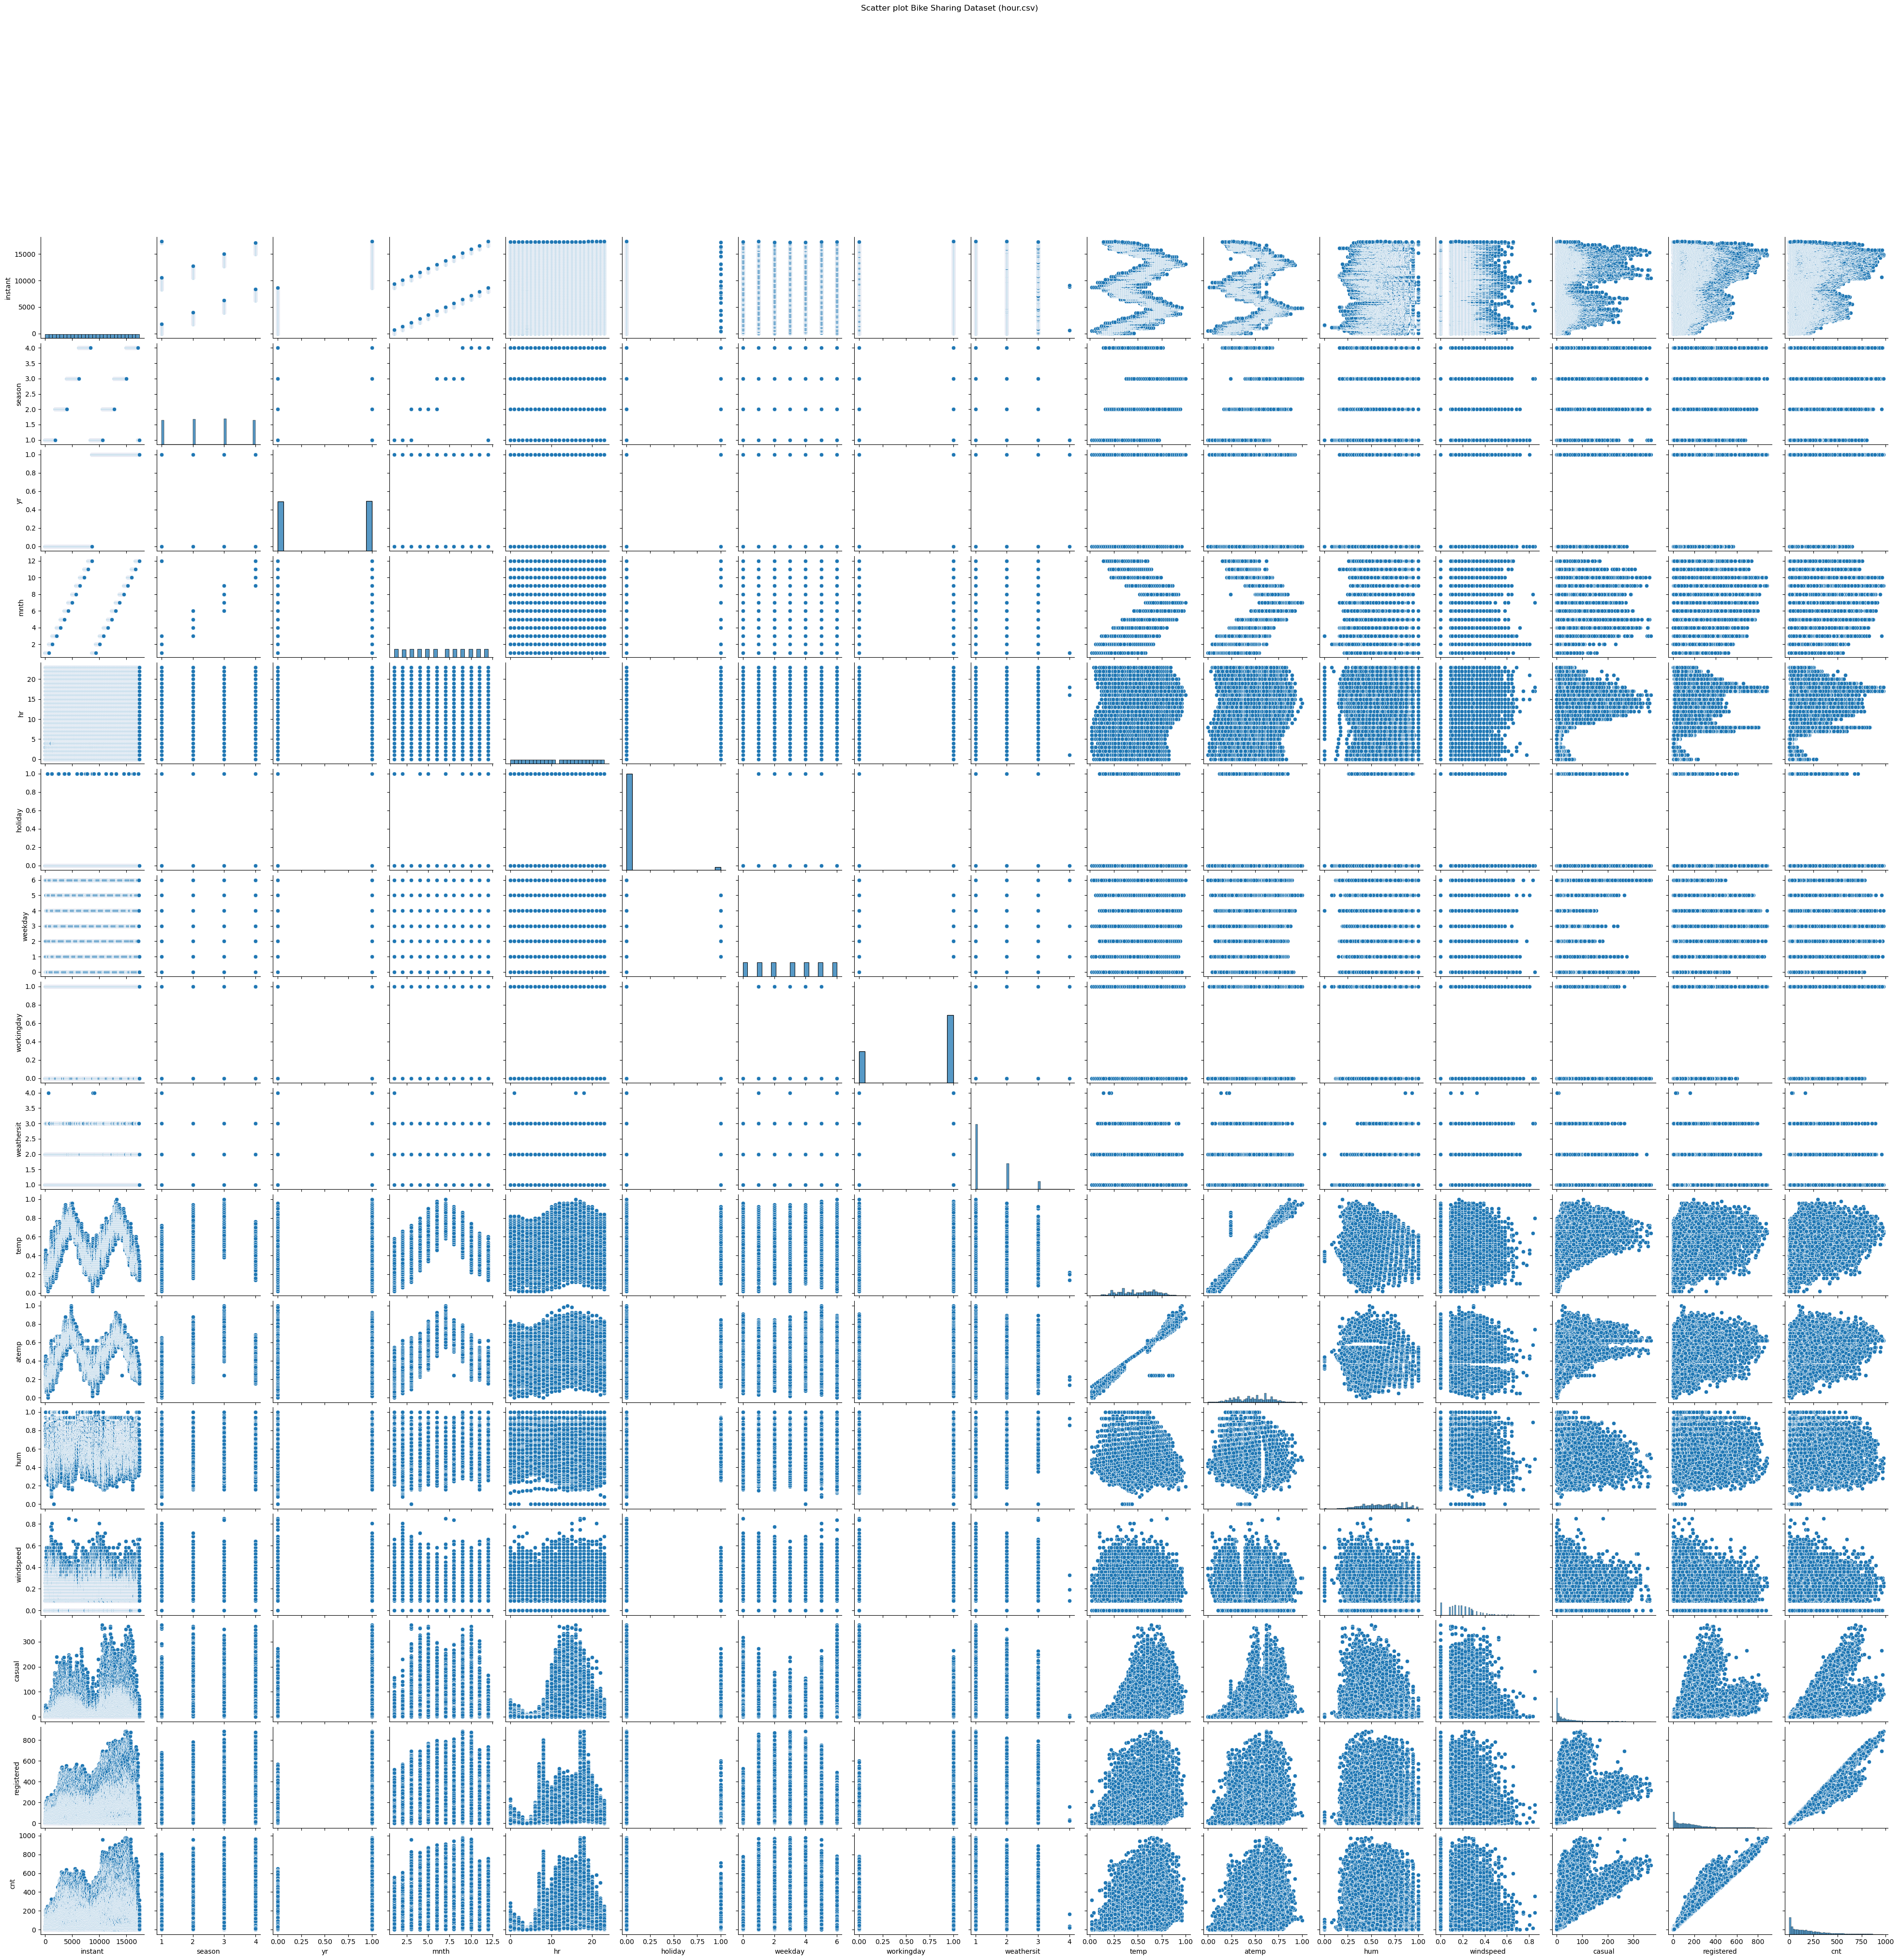

In [13]:
# Membuat scatter plot dengan pairplot
g = sns.pairplot(bikehour_df)
g.fig.suptitle("Scatter plot Bike Sharing Dataset (hour.csv)", y=1.02)
plt.subplots_adjust(top=0.9)
plt.show()

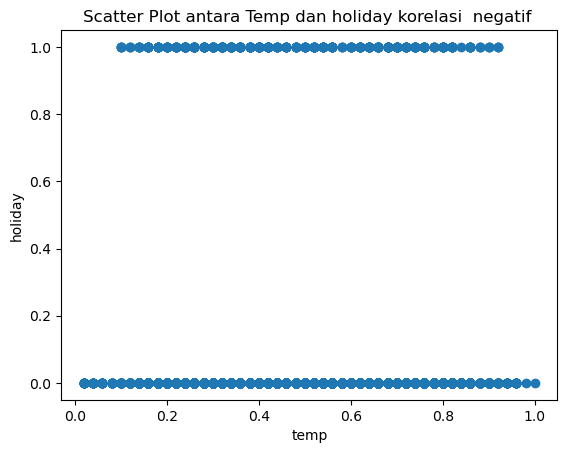

In [14]:
plt.scatter(bikehour_df["temp"], bikehour_df["holiday"])
plt.xlabel("temp")
plt.ylabel("holiday")
plt.title("Scatter Plot antara Temp dan holiday korelasi  negatif ")
plt.show()

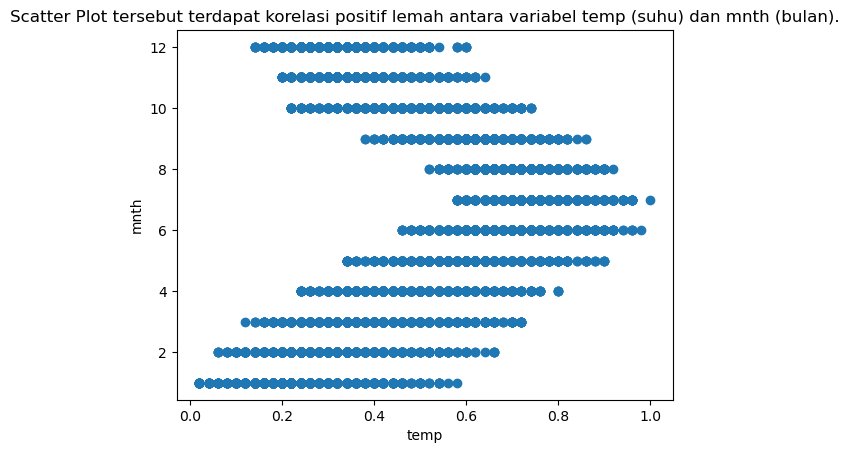

In [15]:
plt.scatter(bikehour_df["temp"], bikehour_df["mnth"])
plt.xlabel("temp")
plt.ylabel("mnth")
plt.title("Scatter Plot tersebut terdapat korelasi positif lemah antara variabel temp (suhu) dan mnth (bulan).")
plt.show()

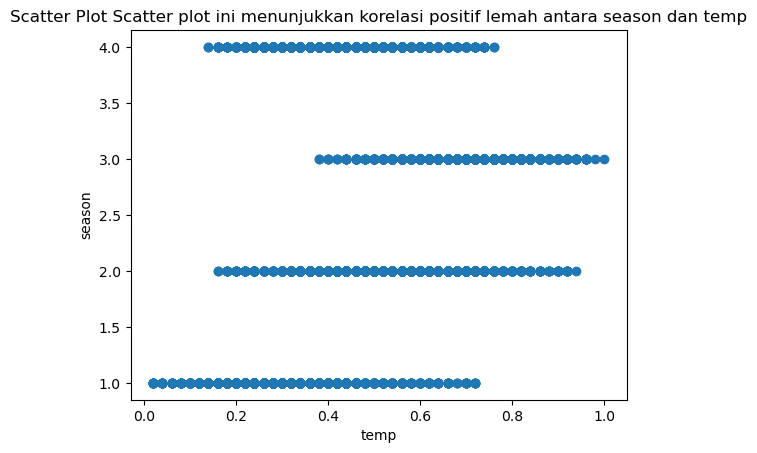

In [16]:
plt.scatter(bikehour_df["temp"], bikehour_df["season"])
plt.xlabel("temp")
plt.ylabel("season")
plt.title("Scatter Plot Scatter plot ini menunjukkan korelasi positif lemah antara season dan temp")
plt.show()

### B. Corelation Matrix

In [17]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


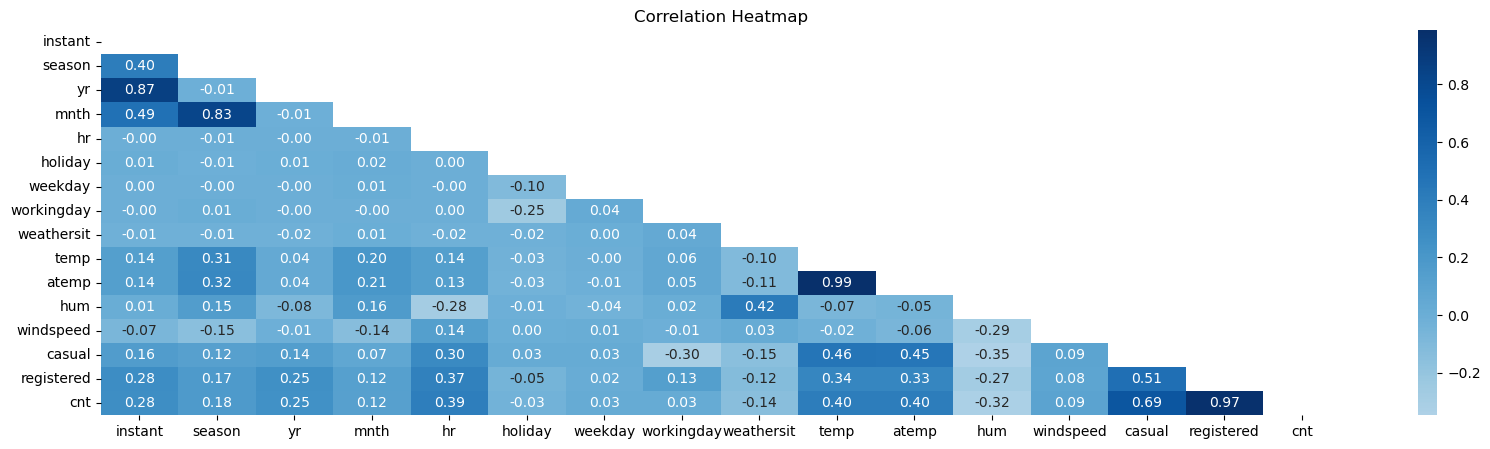

In [18]:
fig, axe = plt.subplots(figsize=(20,5))
correlation_matrix = bikehour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="Blues", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- Correlation heatmap tersebut apabila korelasi lebih tinggi, warna cenderung lebih gelap. Apabila korelasi lebih rendah berwarna biru terang
- Korelasi positif kuat, seperti:
1. variabel temp dan atemp dengan nilai (0.99)
2. variabel cnt dengan registered (0.97)
3. variabel mnth dengan season (0.83)
- korelasi positif moderat, seperti:
1. variabel registered dengan casual (0.51)
2. variabel cnt dengan temp (0.40)
3. variabel weatherspeed denngan hum (0.42)
- korelasi lemah, seperti:
1. variabel hr dengan windspeed (0.14)
- korelasi negatif lemah
1. variabel hr dan hum (-0.28)
2. variabel holiday dan workingday(-0.25)

- Variabel yang berkorelasi positif dengan total sepeda yang disewa
1. casual (kuat)
2. registered (kuat)


### C. Distribusi Data

In [19]:
bikehour_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "mnth" : {1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni",7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"},
    "holiday": {0: "Holiday", 1: "Not Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

In [20]:




categorical_data = bikehour_df[["season", "yr", "mnth","holiday", "workingday", "weekday", "weathersit"]]


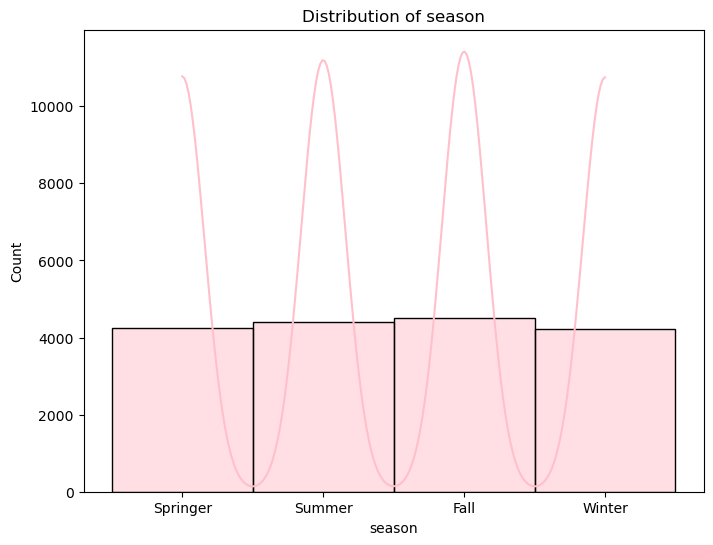

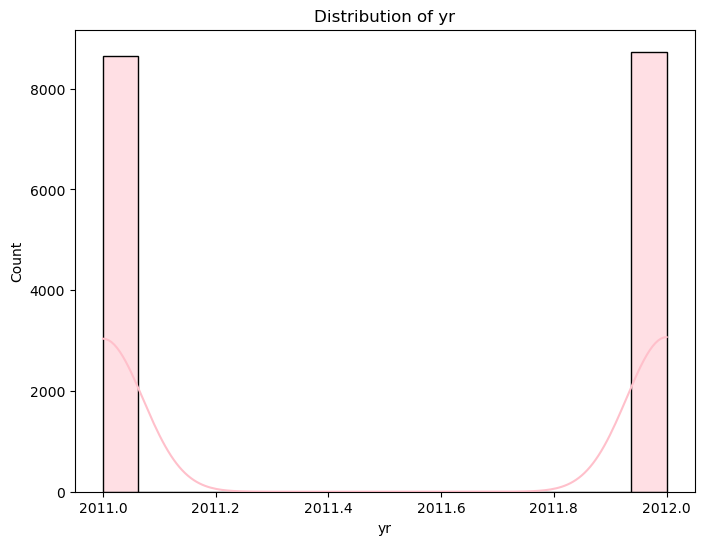

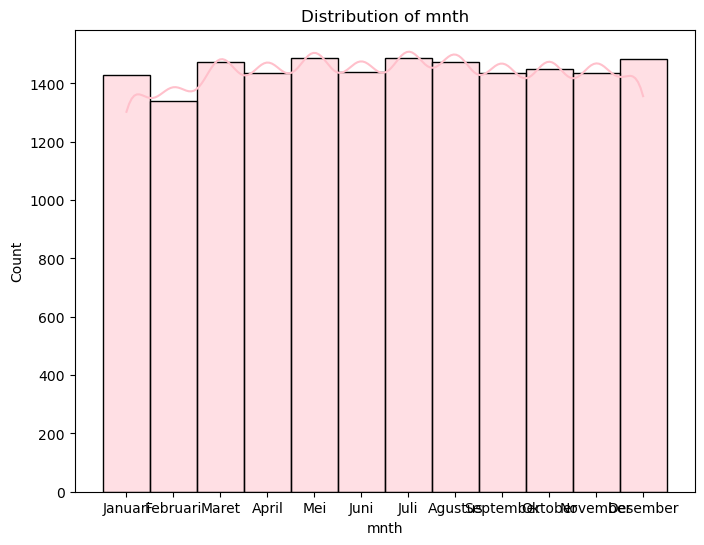

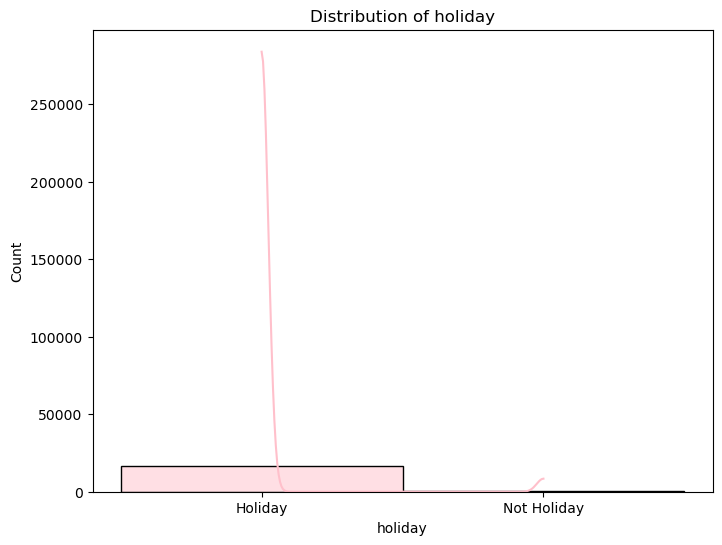

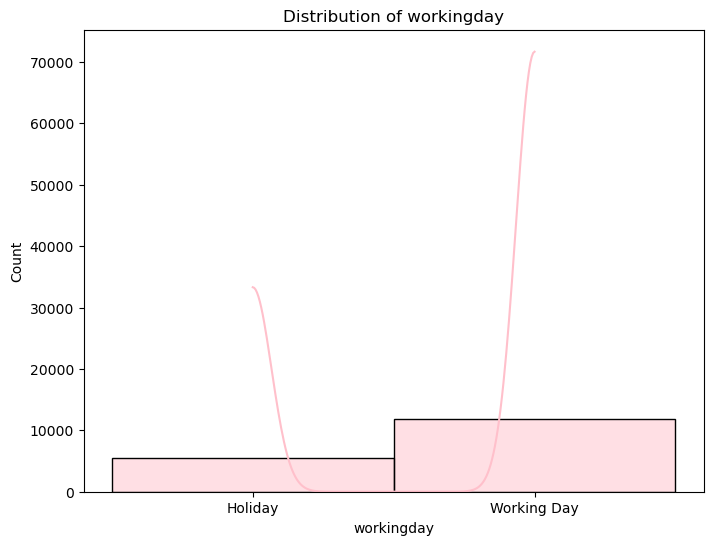

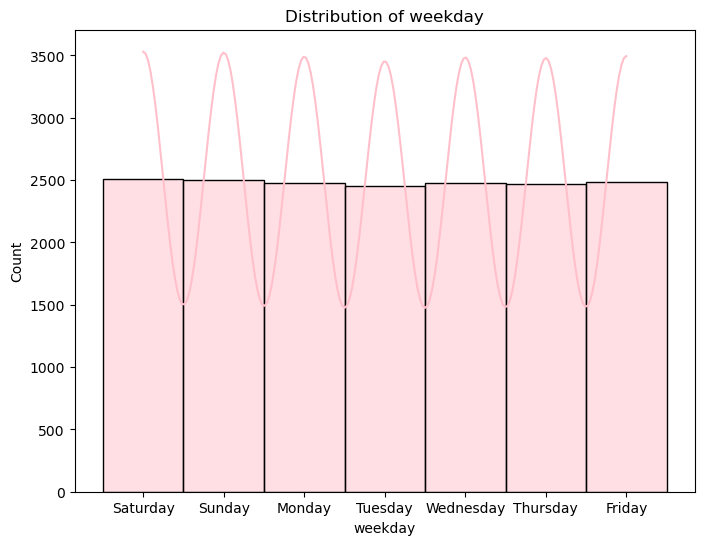

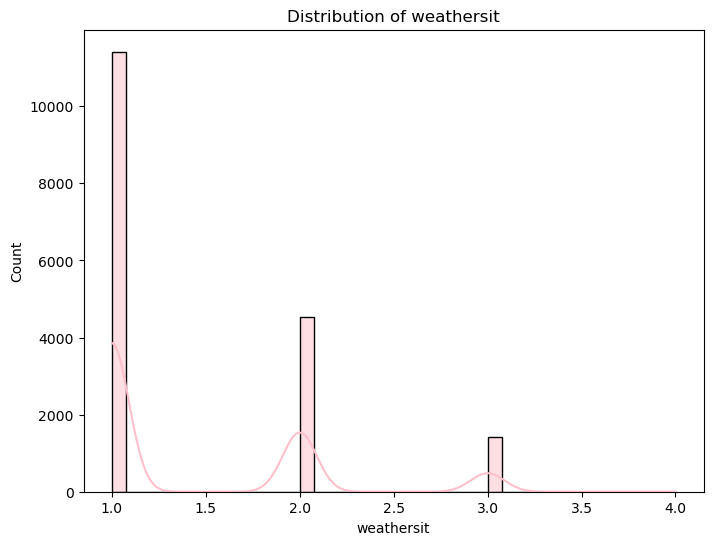

In [21]:
for column in categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(categorical_data, x=column, kde=True, color='pink')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

-  Penyewaan sepeda relatif konsisten di semua musim, dengan sedikit peningkatan di musim panas dan gugur.

-  Jumlah penyewaan sepeda hampir sama di tahun 2011 dan 2012, dengan distribusi data yang seimbang di kedua tahun tersebut.

-  Jumlah penyewaan sepeda cukup stabil sepanjang tahun, dengan sedikit fluktuasi di beberapa bulan.

-  Penyewaan sepeda jauh lebih rendah pada hari libur dibandingkan hari biasa.

-  Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur, menunjukkan pola penggunaan yang tinggi pada hari kerja.

- Penyewaan sepeda cukup merata sepanjang minggu, dengan sedikit peningkatan di akhir pekan.

-  Sebagian besar penyewaan sepeda terjadi dalam kondisi cuaca yang baik (kategori 1), sementara cuaca buruk (kategori 3) menurunkan jumlah penyewaan.

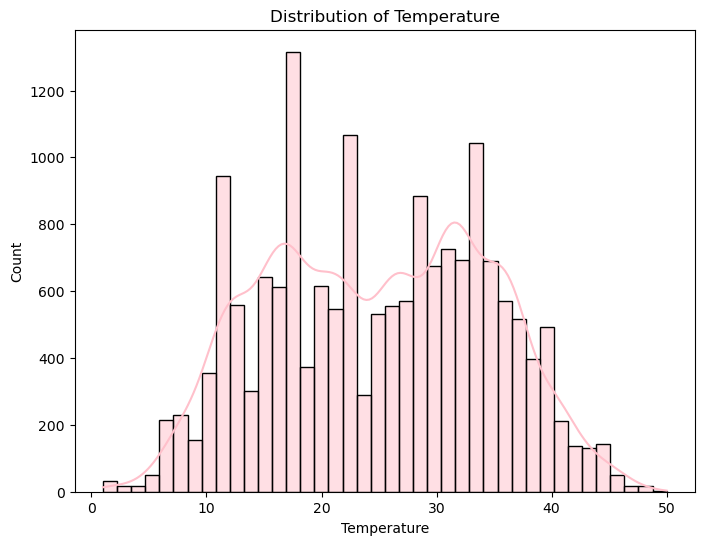

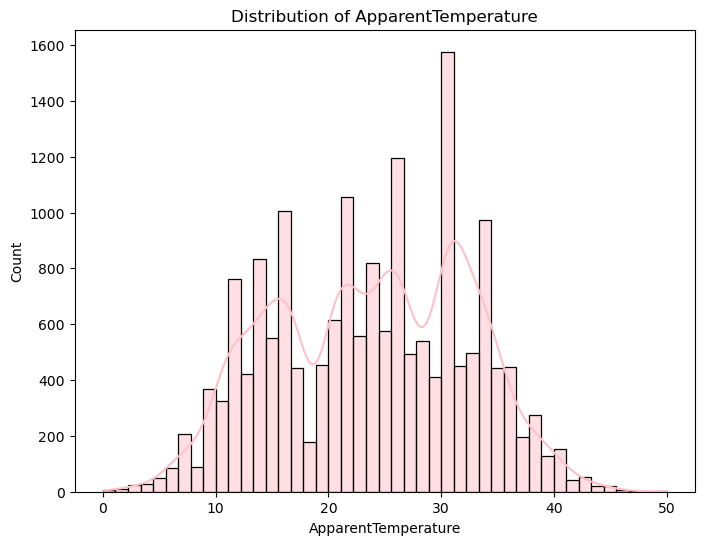

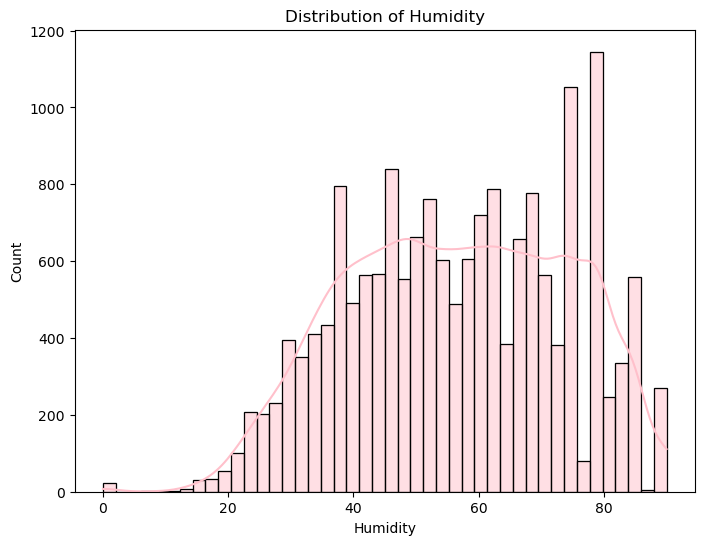

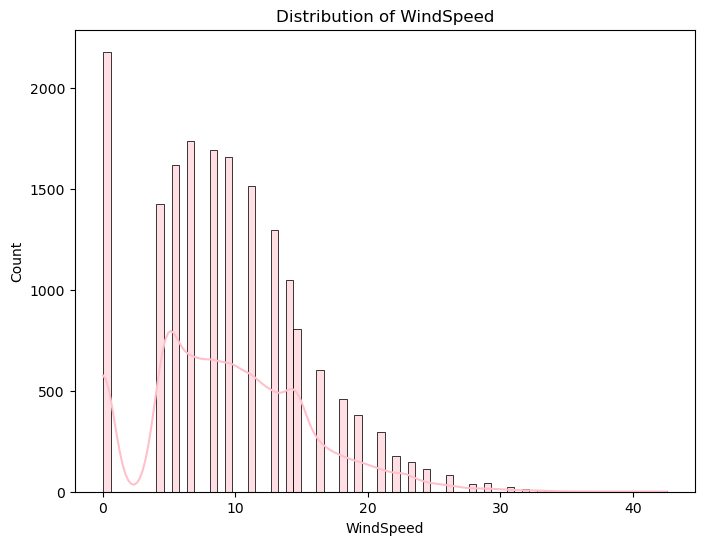

In [22]:

bikehour_df.rename(columns={
    "temp": "Temperature",
    "atemp": "ApparentTemperature",
    "hum": "Humidity",
    "windspeed": "WindSpeed"
}, inplace=True)

bikehour_df["Temperature"] = bikehour_df["Temperature"].multiply(50)
bikehour_df["ApparentTemperature"] = bikehour_df["ApparentTemperature"].multiply(50)
bikehour_df["Humidity"] = bikehour_df["Humidity"].multiply(90)
bikehour_df["WindSpeed"] = bikehour_df["WindSpeed"].multiply(50)

scaled_columns = bikehour_df[["Temperature", "ApparentTemperature", "Humidity", "WindSpeed"]]

for column in scaled_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=scaled_columns, x=column, kde=True, color='pink')  # Mengatur warna menjadi pink
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

-  Sebagian besar penyewaan sepeda terjadi pada suhu sekitar 20-30°C, dengan penurunan jumlah penyewaan di suhu ekstrem (terlalu panas atau terlalu dingin).

- Mirip dengan suhu aktual, sebagian besar penyewaan terjadi saat suhu yang dirasakan berada di sekitar 20-30°C.

- Penyewaan sepeda paling banyak terjadi pada tingkat kelembaban 60-80%, dengan sedikit penyewaan pada kelembaban yang lebih rendah.

- Sebagian besar penyewaan sepeda terjadi saat kecepatan angin rendah (0-10 m/s), dan jumlah penyewaan menurun seiring dengan peningkatan kecepatan angin.

### 2. Data day.csv

### A. Scatter plot

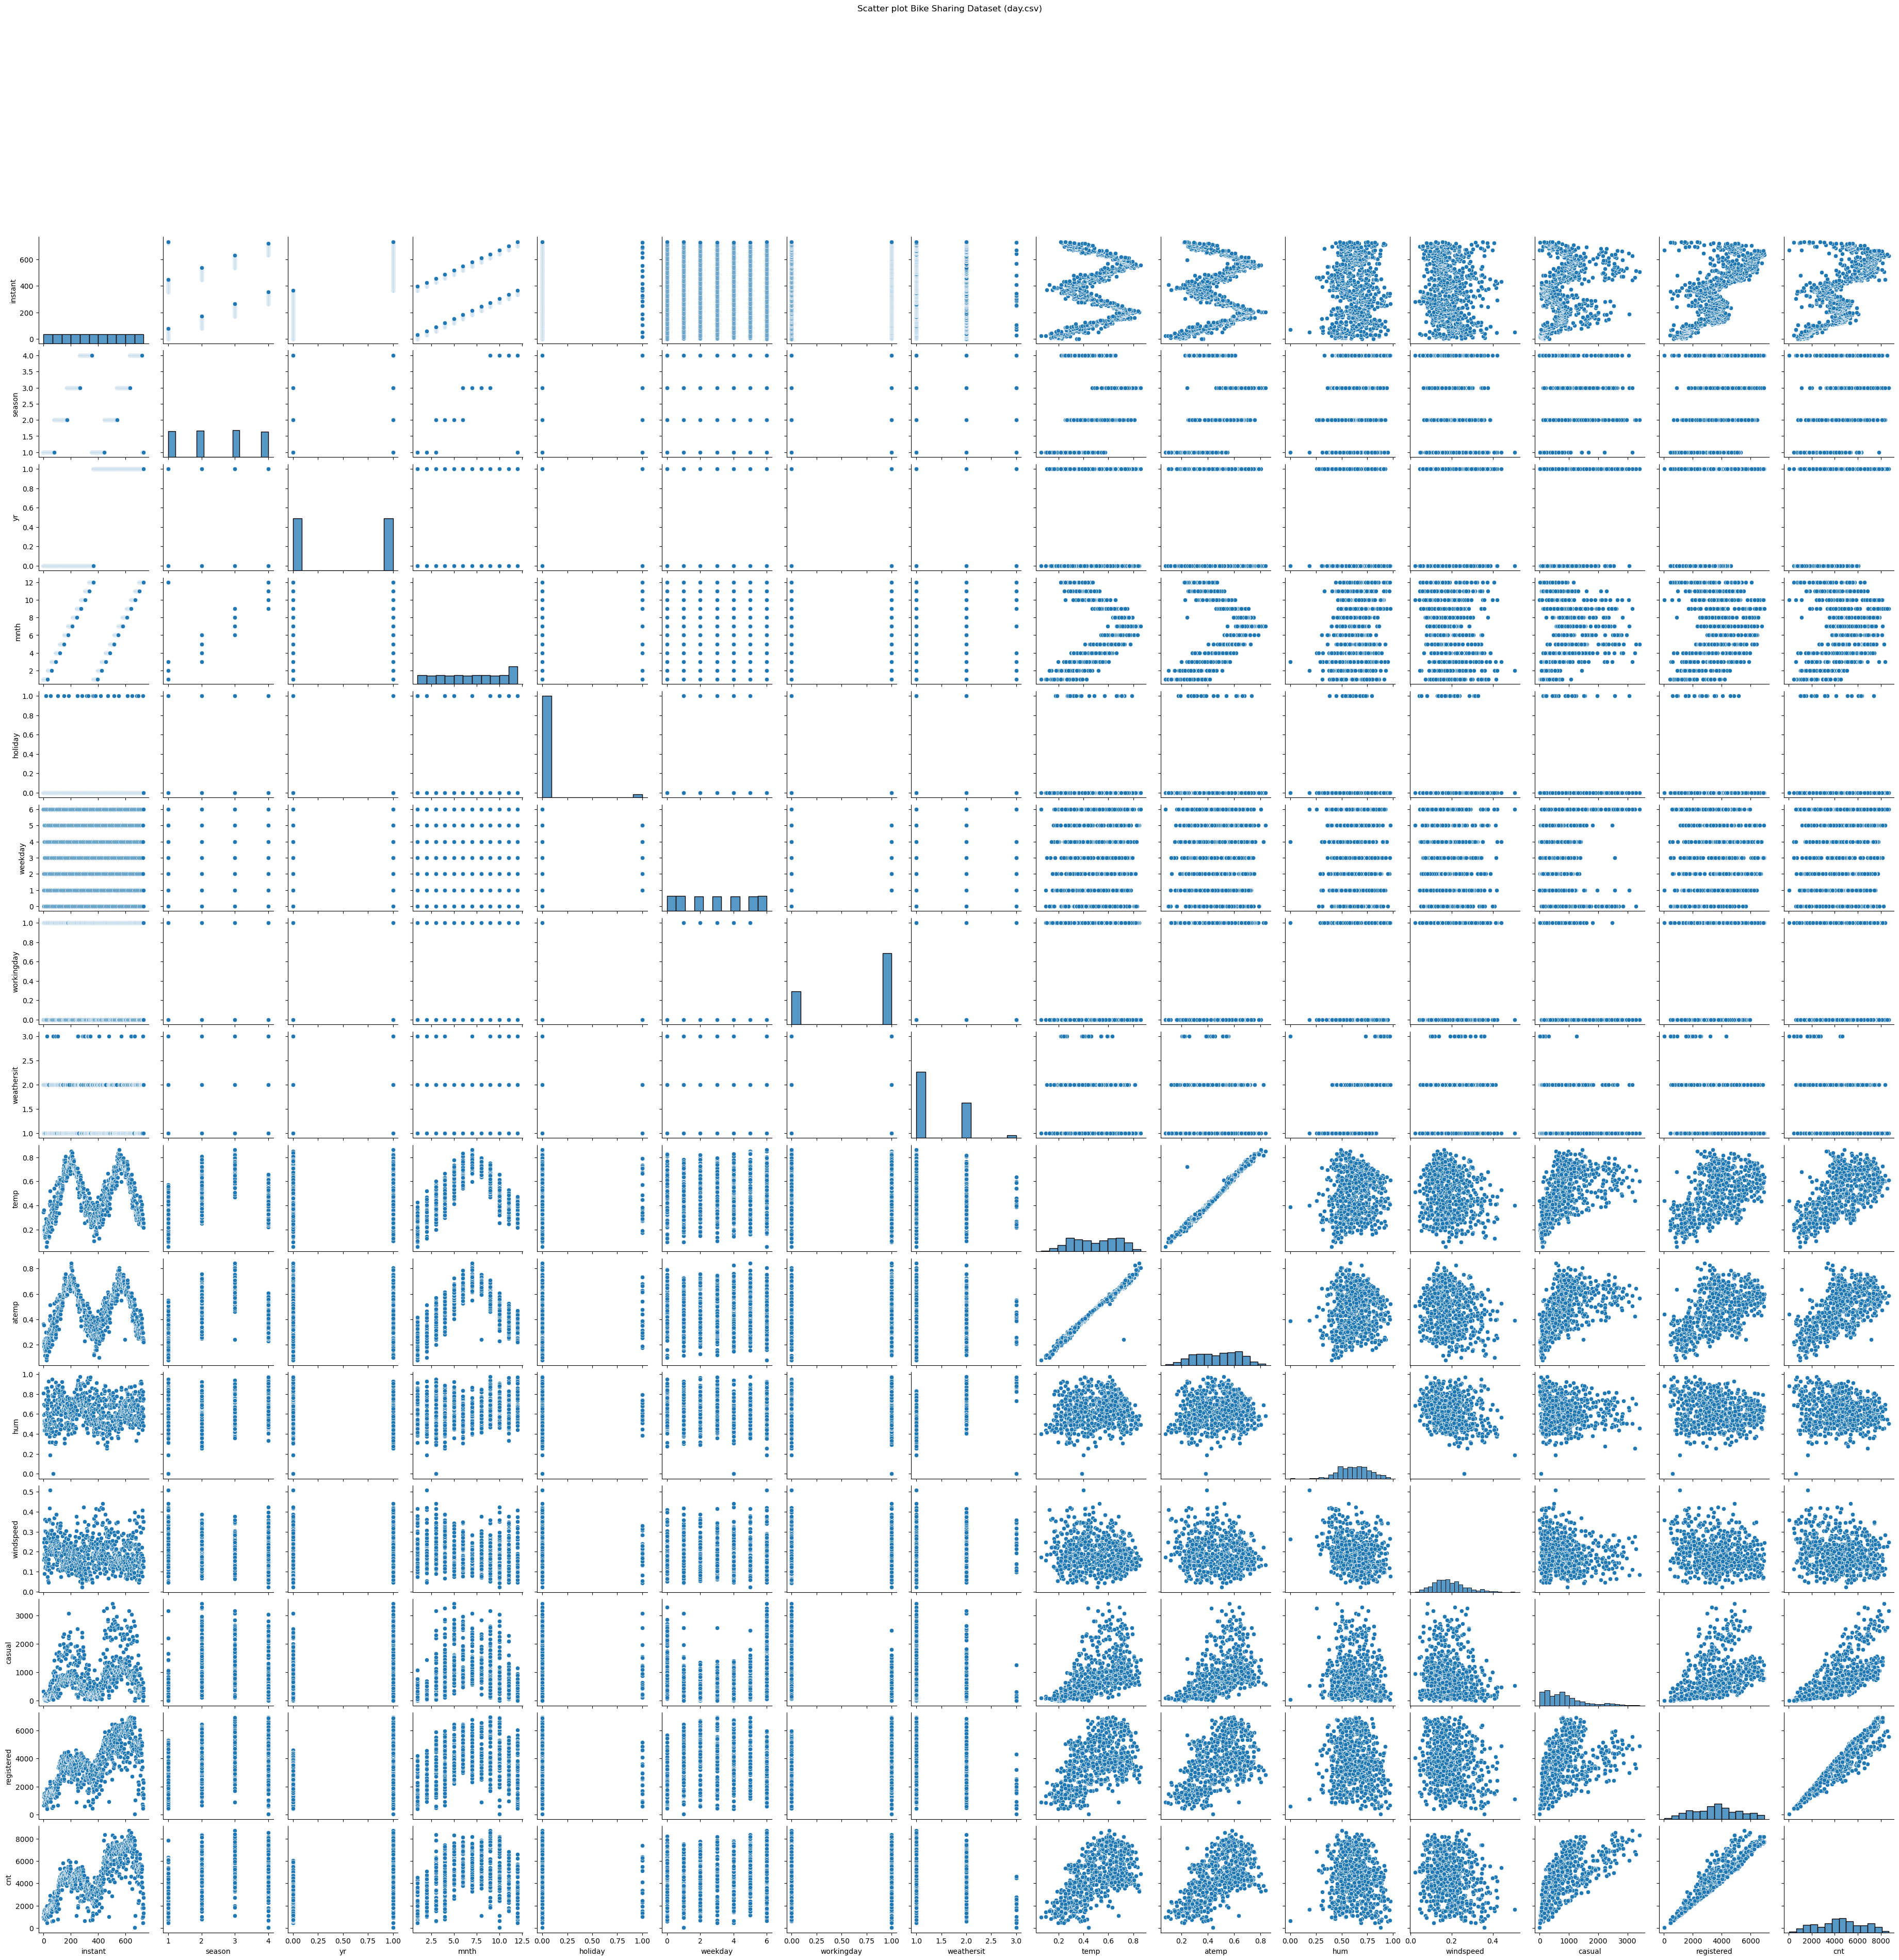

In [23]:

g = sns.pairplot(bikeday_df)
g.fig.suptitle("Scatter plot Bike Sharing Dataset (day.csv)", y=1.02)
plt.subplots_adjust(top=0.9)
plt.show()

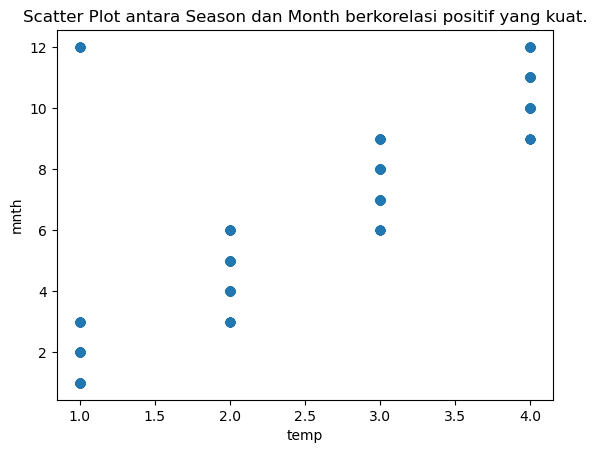

In [24]:
plt.scatter(bikeday_df["season"], bikeday_df["mnth"])
plt.xlabel("temp")
plt.ylabel("mnth")
plt.title("Scatter Plot antara Season dan Month berkorelasi positif yang kuat.")
plt.show()

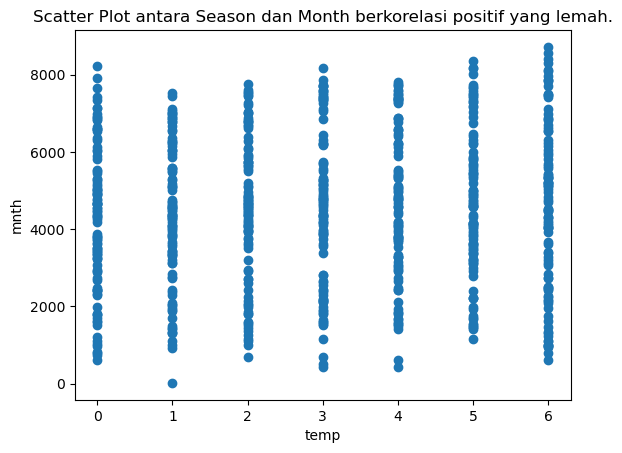

In [25]:
plt.scatter(bikeday_df["weekday"], bikeday_df["cnt"])
plt.xlabel("temp")
plt.ylabel("mnth")
plt.title("Scatter Plot antara Season dan Month berkorelasi positif yang lemah.")
plt.show()

### B. Correlation Matrix

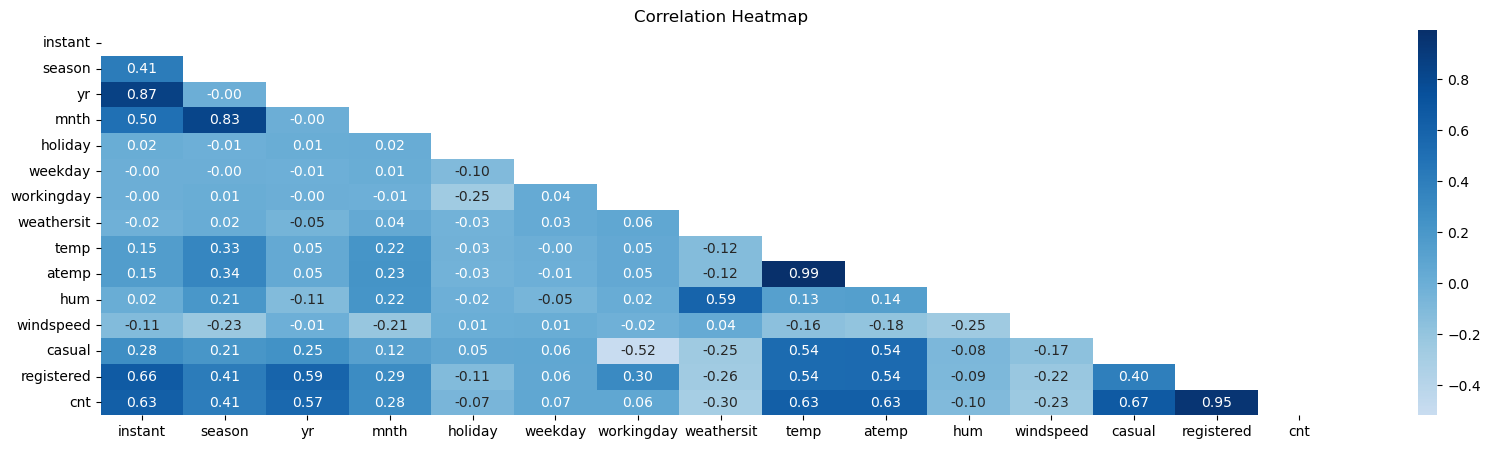

In [26]:
fig, axe = plt.subplots(figsize=(20,5))
correlation_matrix = bikeday_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="Blues", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- variabel yang berkorelasi positif dengan jumlah penyewaan sepeda adalah
1. registered (kuat)
2. casual (kuat)
- variabel yang berkorelasi negatif dengan jumlah penyewaan sepeda
1. holiday (lemah)
2. weathersit (sedang/moderat)

### C. Distribusi Data

In [27]:
bikeday_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "mnth" : {1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni",7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"},
    "holiday": {0: "Holiday", 1: "Not Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

In [28]:
categorical_data2 = bikehour_df[["season", "yr", "mnth","holiday", "workingday", "weekday", "weathersit"]]

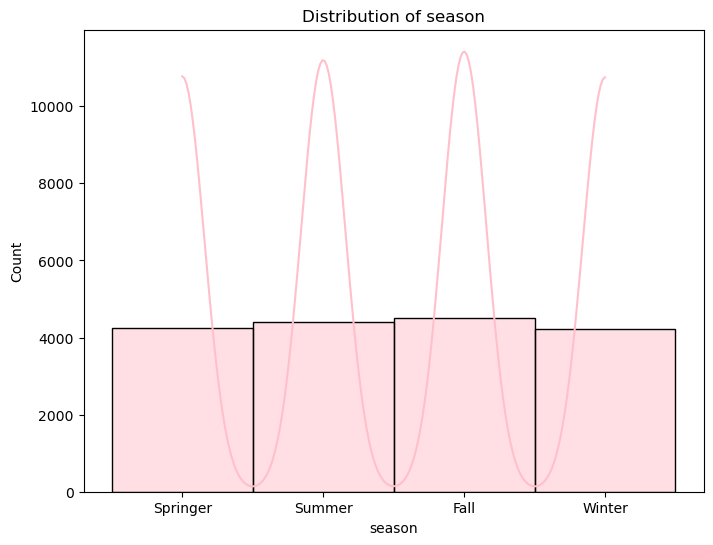

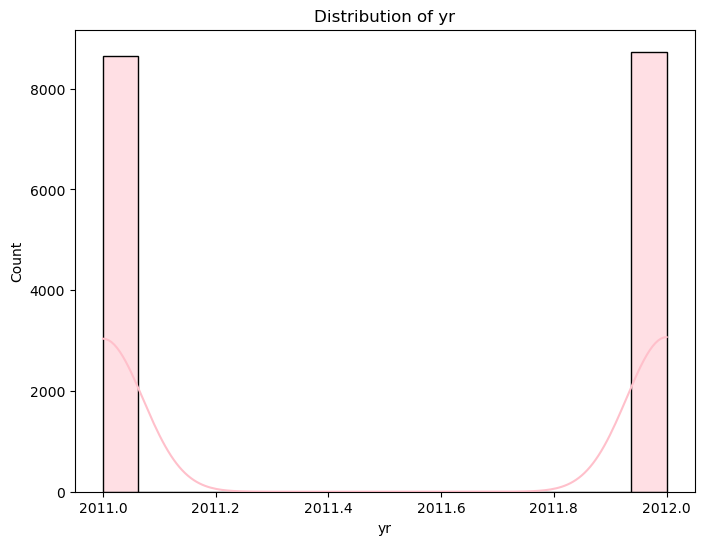

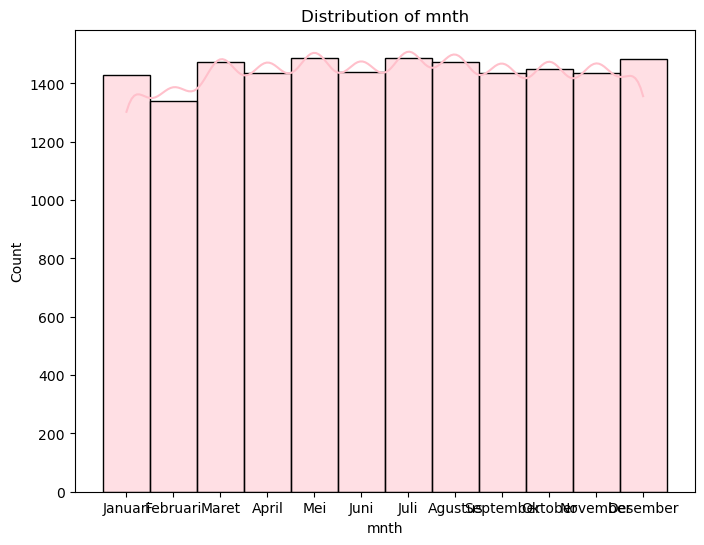

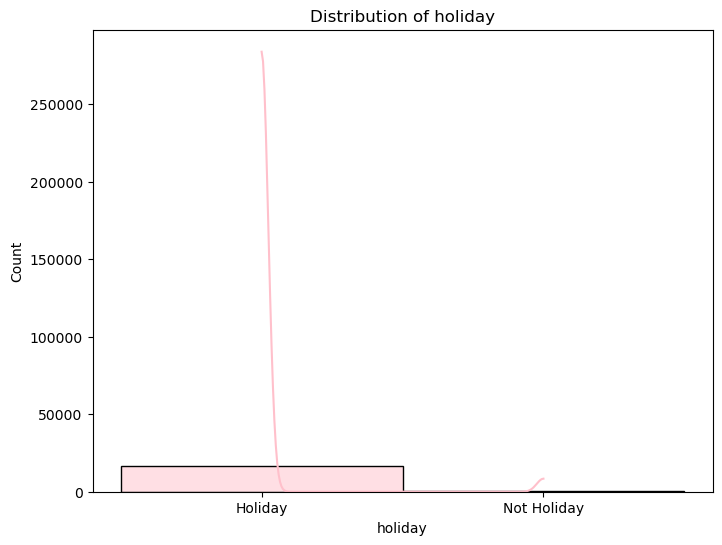

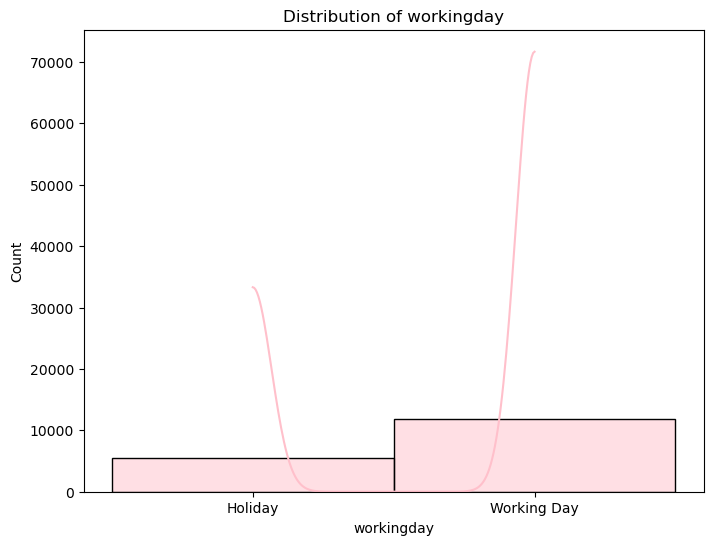

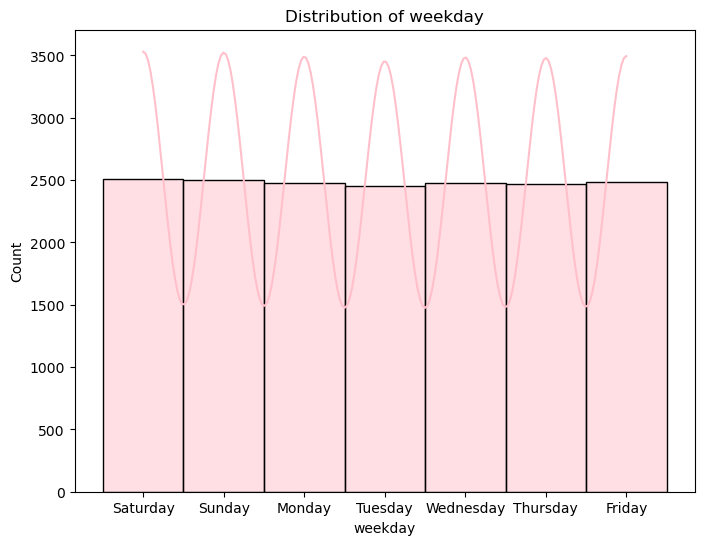

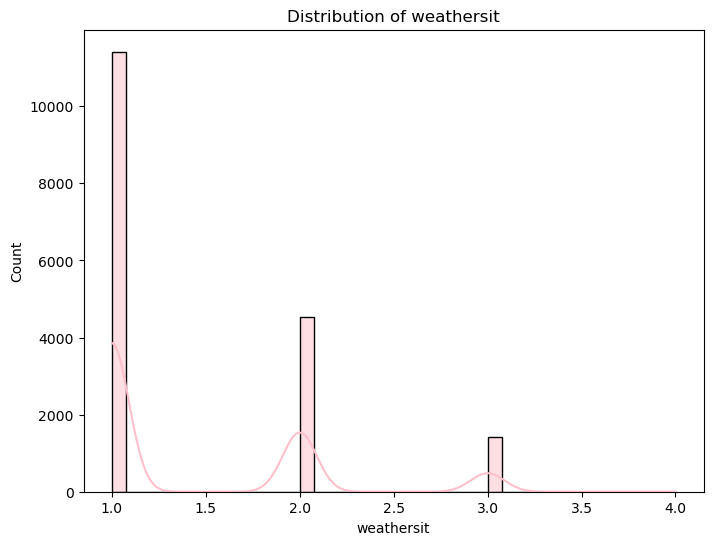

In [29]:
for column in categorical_data2.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(categorical_data2, x=column, kde=True, color='pink')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

- Jumlah penyewaan sepeda relatif konsisten di setiap musim, dengan sedikit peningkatan di musim panas dan gugur.

- Penyewaan sepeda hampir merata antara tahun 2011 dan 2012, tanpa perbedaan signifikan di antara keduanya.

- Penyewaan sepeda stabil sepanjang tahun, dengan sedikit fluktuasi di beberapa bulan tertentu.

- Jumlah penyewaan jauh lebih rendah pada hari libur dibandingkan hari biasa.

- Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur, dengan distribusi yang jelas.

- Jumlah penyewaan sepeda relatif merata setiap hari dalam seminggu, dengan sedikit variasi antara hari-hari.

- Sebagian besar penyewaan terjadi pada kondisi cuaca yang baik (kategori 1), dengan penurunan signifikan saat kondisi cuaca memburuk (kategori 3).

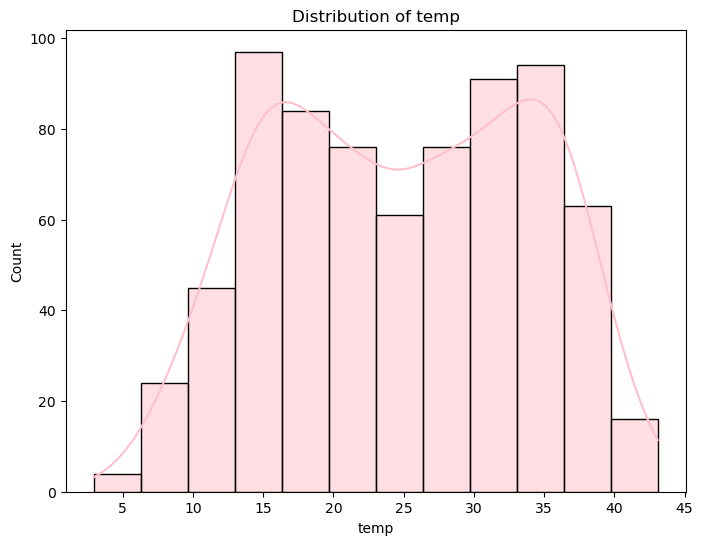

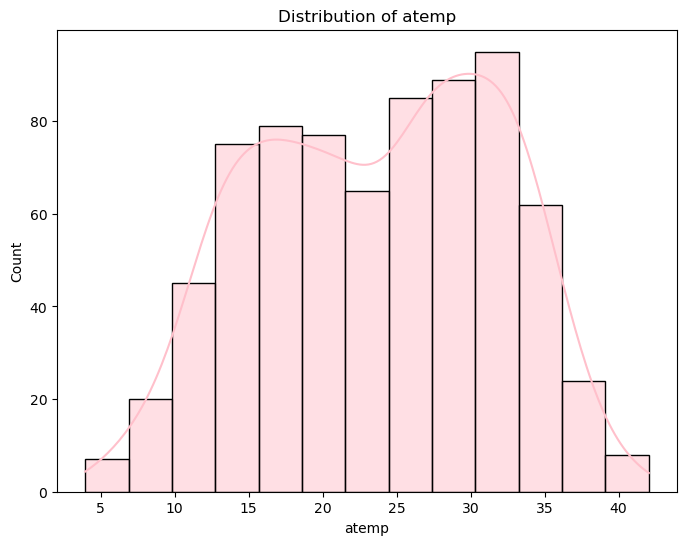

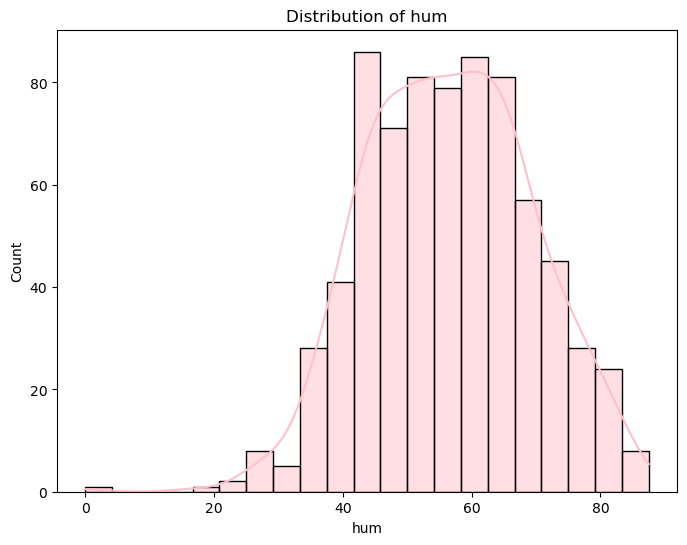

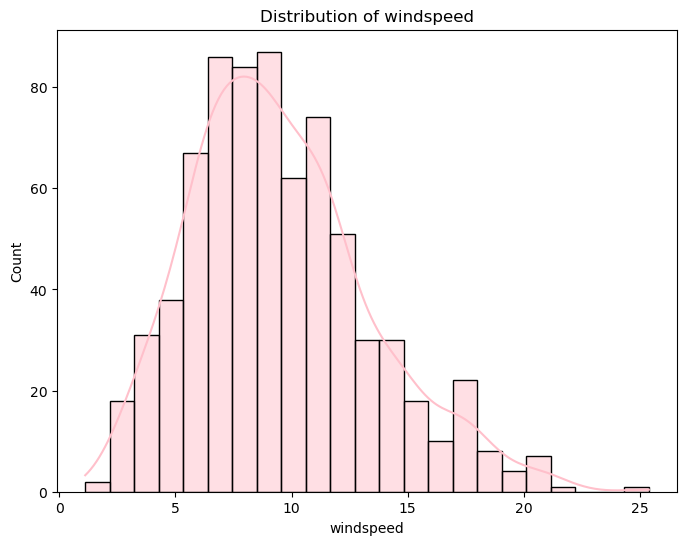

In [30]:
# Mengalikan nilai kolom tanpa mengubah nama kolom
bikeday_df["temp"] = bikeday_df["temp"].multiply(50)
bikeday_df["atemp"] = bikeday_df["atemp"].multiply(50)
bikeday_df["hum"] = bikeday_df["hum"].multiply(90)
bikeday_df["windspeed"] = bikeday_df["windspeed"].multiply(50)

scaled_columns = bikeday_df[["temp", "atemp", "hum", "windspeed"]]

# Plot distribusi tanpa mengubah nama kolom
for column in scaled_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=scaled_columns, x=column, kde=True, color='pink')  # Mengatur warna menjadi pink
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


- Sebagian besar penyewaan sepeda terjadi pada rentang suhu 15-35°C, dengan puncaknya di sekitar 20-30°C.

- Penyewaan sepeda paling sering terjadi saat suhu yang dirasakan berada di sekitar 20-30°C, serupa dengan suhu aktual.

- Penyewaan sepeda meningkat pada tingkat kelembaban sedang (sekitar 40-70%), dengan puncak di sekitar 50-60%.

-  Sebagian besar penyewaan sepeda terjadi saat kecepatan angin rendah (sekitar 5-10 m/s), dan jumlahnya menurun seiring meningkatnya kecepatan angin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan jumlah penyewaan sepeda selama tahun 2011-2012 berdasarkan efek musim?

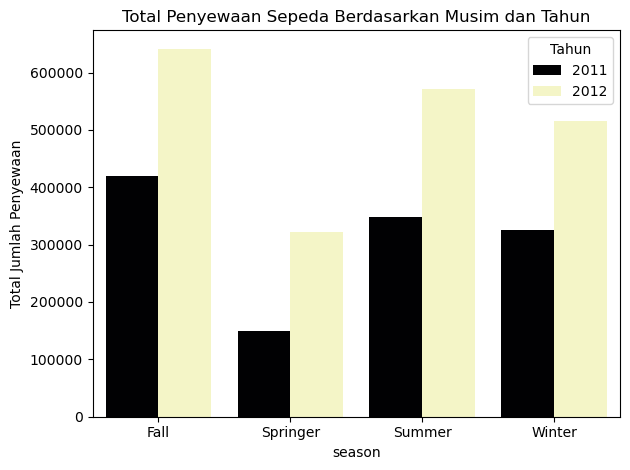

In [31]:
total_sewa_per_musim = bikehour_df.groupby(["season", "yr"])["cnt"].sum().reset_index()


sns.barplot(data=total_sewa_per_musim, x="season", y="cnt", hue="yr", palette="magma")


plt.ylabel("Total Jumlah Penyewaan")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim dan Tahun")
plt.legend(title="Tahun", loc="best")
plt.tight_layout()


plt.show()


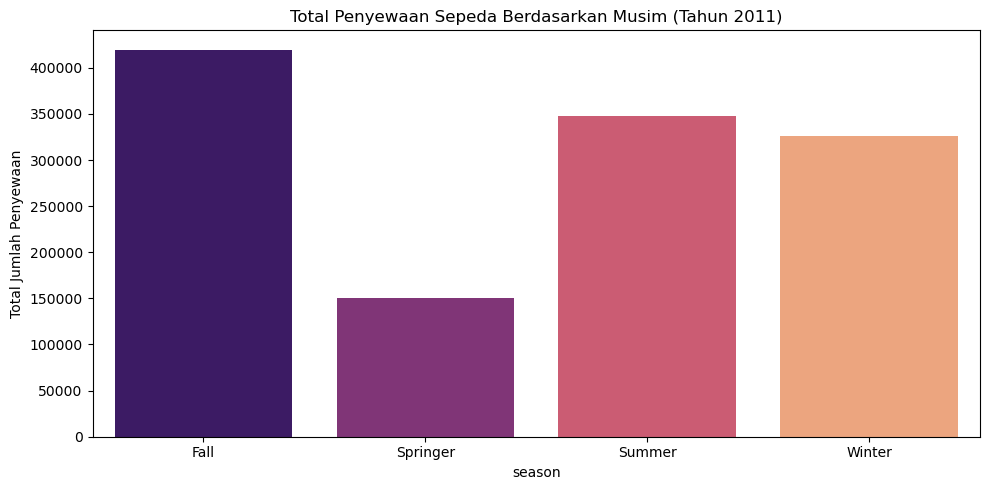

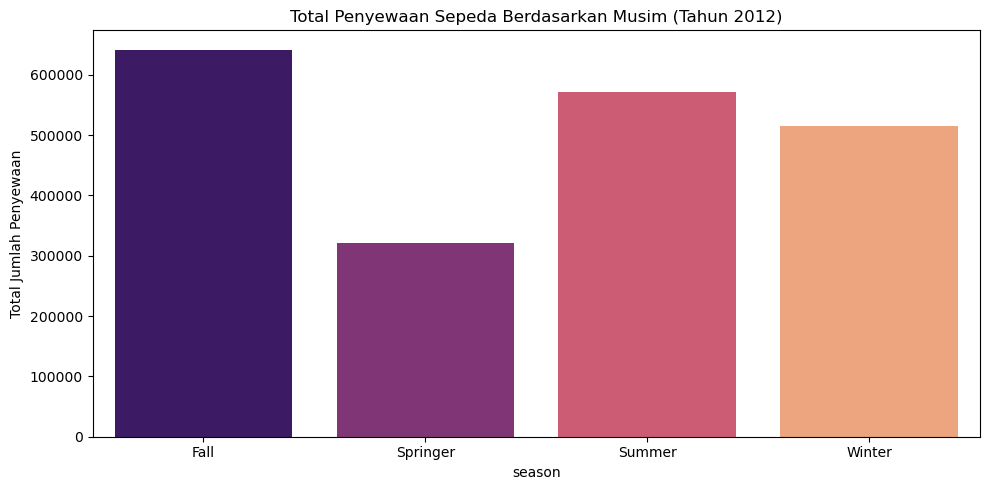

In [32]:

data_2011 = bikehour_df[bikehour_df["yr"] == 2011]
data_2012 = bikehour_df[bikehour_df["yr"] == 2012]


total_sewa_per_musim_2011 = data_2011.groupby("season")["cnt"].sum().reset_index()
total_sewa_per_musim_2012 = data_2012.groupby("season")["cnt"].sum().reset_index()


plt.figure(figsize=(10, 5))
sns.barplot(data=total_sewa_per_musim_2011, x="season", y="cnt", palette="magma")
plt.ylabel("Total Jumlah Penyewaan")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim (Tahun 2011)")
plt.tight_layout()


plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(data=total_sewa_per_musim_2012, x="season", y="cnt", palette="magma")
plt.ylabel("Total Jumlah Penyewaan")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim (Tahun 2012)")
plt.tight_layout()


plt.show()


### Pertanyaan 2: Bagaimana perbandingan jumlah penyewaan sepeda selama tahun 2011-2012 berdasarkan efek cuaca?

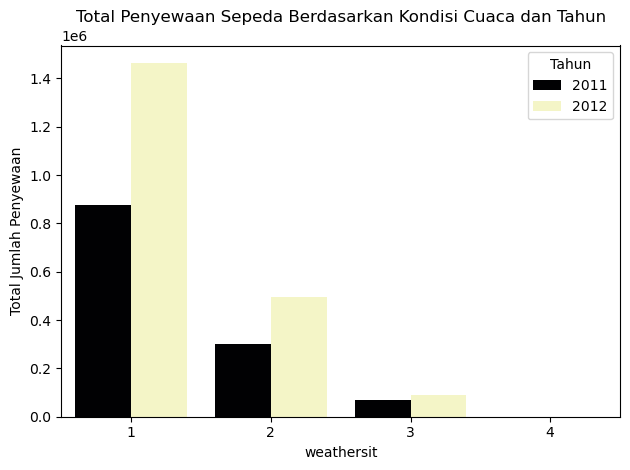

In [33]:

total_sewa_per_cuaca = bikehour_df.groupby(["weathersit", "yr"])["cnt"].sum().reset_index()
sns.barplot(data=total_sewa_per_cuaca, x="weathersit", y="cnt", hue="yr", palette="magma")

plt.ylabel("Total Jumlah Penyewaan")
plt.title("Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca dan Tahun")
plt.legend(title="Tahun", loc="best")
plt.tight_layout()
plt.show()


### Pertanyaan 3: Bagimana Analisa Penyewaan Pada Tiap Hari tahun 2011 dan 2012?

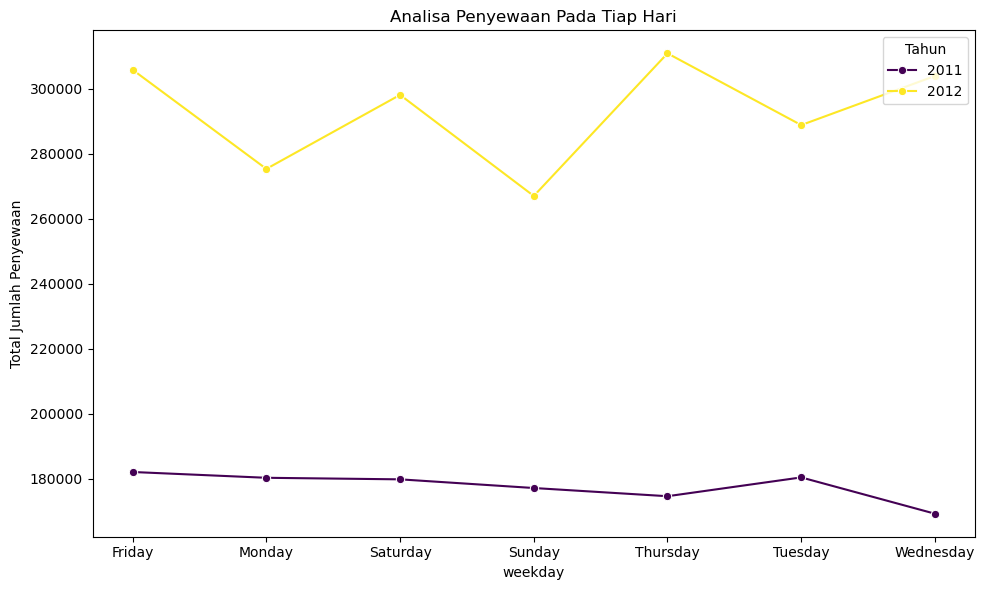

In [34]:
jumlah_rental_weekday = bikehour_df.groupby(["weekday", "yr"])["cnt"].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=jumlah_rental_weekday, x="weekday", y="cnt", hue="yr", palette="viridis", marker="o")

plt.ylabel("Total Jumlah Penyewaan")
plt.title("Analisa Penyewaan Pada Tiap Hari")
plt.legend(title="Tahun", loc="upper right")

plt.xticks(ticks=jumlah_rental_weekday["weekday"].unique(), labels=jumlah_rental_weekday["weekday"].astype(str).unique())
plt.tight_layout()


### Pertanyaan 4: Bagaimana perbandingan pengguna casual dan terdaftar dalam tahun 2011 dan 2012?

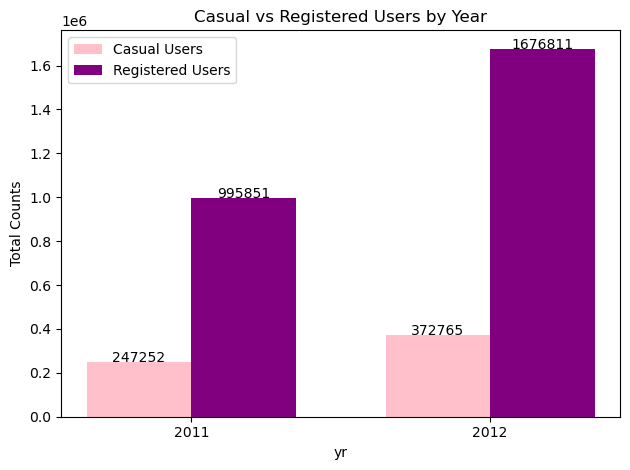

In [35]:
casual_counts = bikehour_df.groupby("yr")["casual"].sum().reset_index()
casual_counts.columns = ["yr", "Total_Casual"]

registered_counts = bikehour_df.groupby("yr")["registered"].sum().reset_index()
registered_counts.columns = ["yr", "Total_Registered"]

index = casual_counts["yr"]
bar_width = 0.35
plt.bar(index, casual_counts["Total_Casual"], bar_width, label="Casual Users", color="pink")
plt.bar(index + bar_width, registered_counts["Total_Registered"], bar_width, label="Registered Users", color="purple")

plt.xlabel("yr")
plt.ylabel("Total Counts")
plt.title("Casual vs Registered Users by Year")
plt.xticks(index + bar_width / 2, casual_counts["yr"])
plt.legend()


for bar in plt.bar(index, casual_counts["Total_Casual"], bar_width, color="pink"):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(int(bar.get_height())), ha="center")

for bar in plt.bar(index + bar_width, registered_counts["Total_Registered"], bar_width, color="purple"):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(int(bar.get_height())), ha="center")

plt.tight_layout()
plt.show()


### Pertanyaan 5: Bagaimana jumlah penyewaan pada setiap bulan

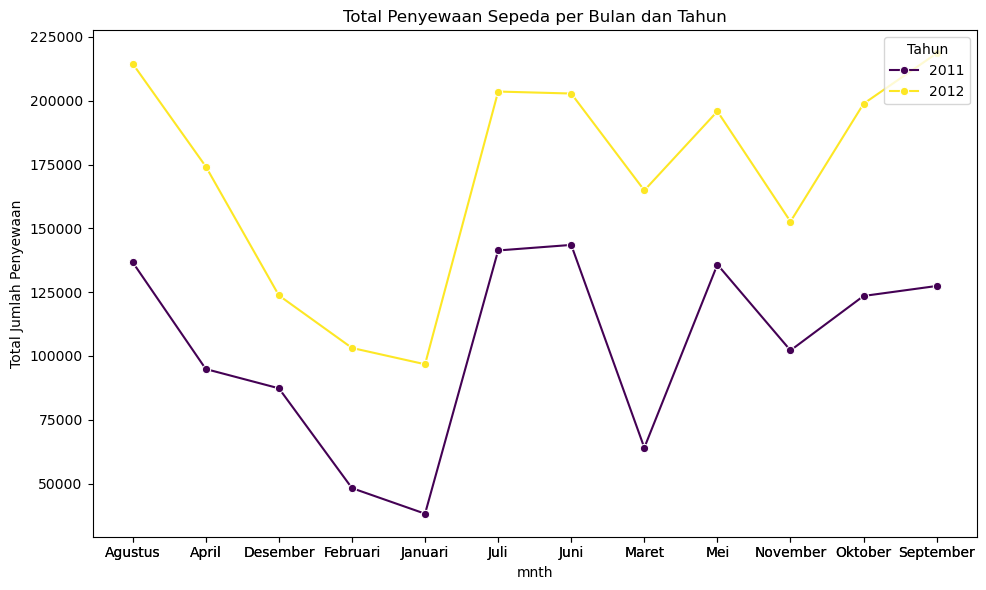

In [36]:

jumlah_rental_bulanan = bikehour_df.groupby(["mnth", "yr"])["cnt"].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=jumlah_rental_bulanan, x="mnth", y="cnt", hue="yr", palette="viridis", marker="o")

plt.ylabel("Total Jumlah Penyewaan")
plt.title("Total Penyewaan Sepeda per Bulan dan Tahun")
plt.legend(title="Tahun", loc="upper right")

plt.xticks(ticks=jumlah_rental_bulanan["mnth"], labels=jumlah_rental_bulanan["mnth"].astype(str))
plt.tight_layout()
plt.show()


### Pertanyaan 6: Bagaimana jumlah penyewaan pada jam tertentu?

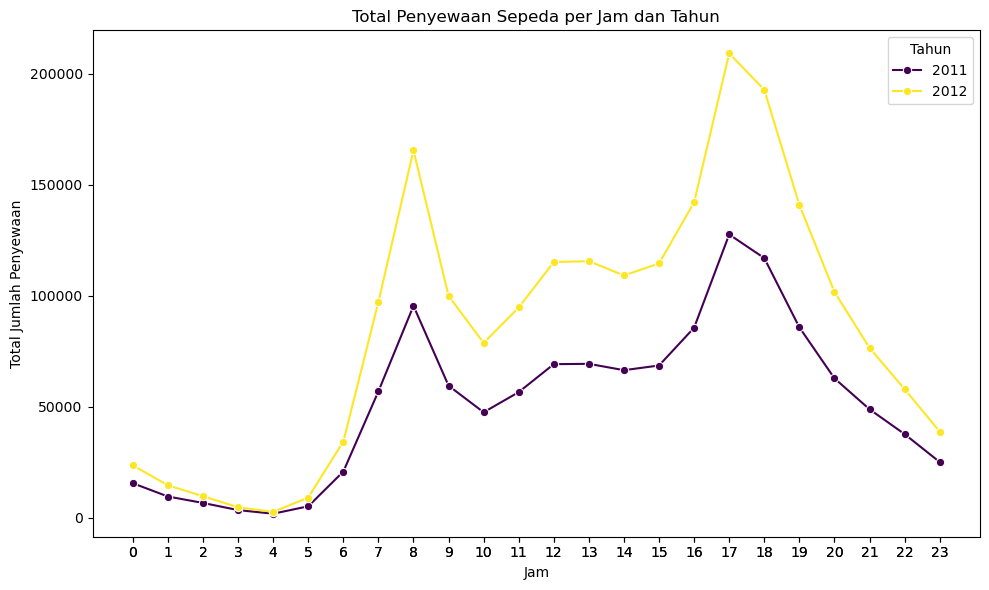

In [37]:

jumlah_rental_jam = bikehour_df.groupby(["hr", "yr"])["cnt"].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=jumlah_rental_jam, x="hr", y="cnt", hue="yr", palette="viridis", marker="o")

plt.ylabel("Total Jumlah Penyewaan")
plt.xlabel("Jam")
plt.title("Total Penyewaan Sepeda per Jam dan Tahun")
plt.legend(title="Tahun", loc="upper right")

plt.xticks(ticks=jumlah_rental_jam["hr"], labels=jumlah_rental_jam["hr"].astype(str))
plt.tight_layout()

# Menampilkan plot
plt.show()


## Conclusion

**1. Conclution pertanyaan 1**
- Musim Gugur (Fall) memiliki jumlah penyewaan sepeda tertinggi di kedua tahun (2011 dan 2012)

- Musim Panas (Summer) juga menunjukkan jumlah penyewaan yang cukup tinggi, terutama di tahun 2012, meskipun sedikit lebih rendah dibandingkan musim gugur.

- Musim Semi (Springer) memiliki jumlah penyewaan terendah,

- Musim Dingin (Winter) memiliki tingkat penyewaan yang moderat, lebih tinggi dibandingkan dengan musim semi, tetapi masih lebih rendah dibandingkan dengan musim gugur dan panas.
- Secara keseluruhan, terlihat bahwa jumlah penyewaan sepeda meningkat signifikan di tahun 2012 dibandingkan tahun 2011 untuk semua musim.

**2. Conclution pertanyaan 2**
- Kondisi Cuaca 1 ( cuaca cerah / berawan) memiliki jumlah penyewaan sepeda tertinggi baik pada tahun 2011 maupun 2012. Tahun 2012 menunjukkan peningkatan signifikan dalam penyewaan dibandingkan dengan 2011.

- Kondisi Cuaca 2 (kabut/berawan) juga menunjukkan jumlah penyewaan yang cukup signifikan, tetapi lebih rendah dibandingkan cuaca cerah. Namun, ada peningkatan pada tahun 2012 dibandingkan tahun 2011.

- Kondisi Cuaca 3 dan 4 (salju/hujan lebat/cuaca buruk) memiliki jumlah penyewaan sepeda yang sangat rendah di kedua tahun, dengan hampir tidak ada penyewaan yang tercatat pada cuaca terburuk.


**3. Conclution pertanyaan 3**
- Terlihat adanya perbedaan yang signifikan antara jumlah penyewaan sepeda di tahun 2011 dan 2012. Pada tahun 2012, Sabtu dan Kamis adalah hari dengan jumlah penyewaan sepeda tertinggi, diikuti oleh Minggu. Hal ini menunjukkan tren bahwa banyak pengguna yang menyewa sepeda pada akhir pekan, mungkin karena adanya lebih banyak waktu luang atau kegiatan rekreasi.


**4. Conclution pertanyaan 4**
- Tahun 2012 terdapat lonjakan dalam jumlah pengguna terdaftar, sementara pengguna casual menurun. Ini menunjukkan adanya pergeseran preferensi dari pengguna casual ke pengguna terdaftar, mungkin karena keuntungan yang lebih besar untuk mendaftar. Jumlah pengguna terdaftar yang jauh lebih tinggi dari pengguna casual menunjukkan bahwa layanan sepeda lebih populer di kalangan pengguna terdaftar pada kedua tahun tersebut.

**5. Conclution pertanyaan 5**
- Puncak penyewaan sepeda di tahun 2012 terjadi pada bulan Agustus dengan lebih dari 200.000 penyewaan. Pada tahun 2011, puncak penyewaan terjadi di bulan Juli dengan sekitar 125.000 penyewaan, namun jumlahnya jauh lebih rendah dibandingkan puncak di tahun 2012.

**6. Conclution pertanyaan 6**
- Tahun 2012 menunjukkan puncak penyewaan terjadi sekitar jam 17.00 (5 sore) dengan lebih dari 200.000 penyewaan, yang merupakan puncak tertinggi. Tahun 2011 juga menunjukkan pola yang serupa, dengan puncak penyewaan terjadi sekitar jam 17.00, namun jumlahnya lebih rendah dibandingkan tahun 2012, dengan sekitar 150.000 penyewaan. Selain jam 17.00, jam sibuk penyewaan lainnya terjadi sekitar jam 8.00 pagi pada kedua tahun. Penyewaan sepeda secara signifikan menurun setelah jam 19.00, dan mencapai titik terendah di jam 23.00.


In [38]:
bikehour_df.to_csv("Dashboard/data_terpakai.csv", index=False)

In [39]:
pip install numpy==1.26.0


Note: you may need to restart the kernel to use updated packages.
